## 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import copy

## 데이터 불러오기

In [3]:
!git clone https://github.com/daehan11/bigdata_class2.git ## 리눅스 명령어를 쓰기 위함

fatal: 대상 경로가('bigdata_class2') 이미 있고 빈 디렉터리가 아닙니다.


In [2]:
# Read dataset
df = pd.read_csv('bigdata_class2/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


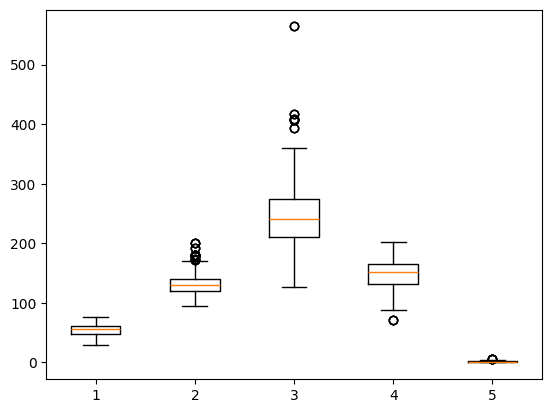

In [3]:
plt.boxplot([df['age'], df['trestbps'], df['chol'], df['thalach'], df['oldpeak']]) ## 25% ~ 75%, 5% ~ 95% , 이상치 , 정규화(단위가 다름, 스케일 맞춰줄려고) 할때 이상치 민감 -> 표쥰화 해라
plt.show()

In [4]:
df1 = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
label = df['target']

In [5]:
tr_x = np.array(df1[0:900])
tr_y = np.array(label[0:900])

te_x = np.array(df1[900:])
te_y = np.array(label[900:])

In [6]:
model = LogisticRegression().fit(tr_x, tr_y)
pred = model.predict(te_x)
1-np.mean(np.abs(pred-te_y))

0.6799999999999999

In [7]:
tr_x2 = copy.deepcopy(tr_x)
te_x2 = copy.deepcopy(te_x)


In [8]:
def standadization(x):
    r, c = np.shape(x)
    for i in range(c):
        x[:,i] = (x[:,i]-np.mean(x[:,i]))/np.std(x[:,i])
    return x

In [9]:
tr_x2 = standadization(tr_x2)
te_x2 = standadization(te_x2)

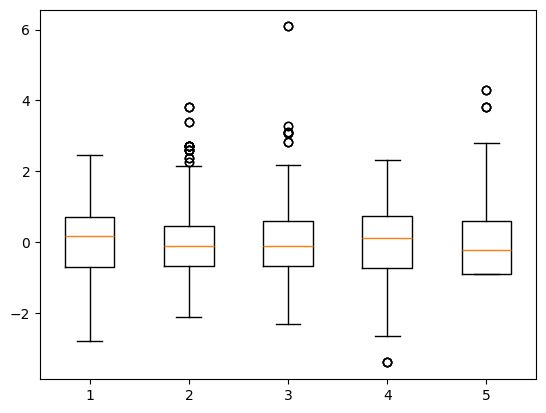

In [10]:
plt.boxplot([tr_x2[:,0], tr_x2[:,1], tr_x2[:,2], tr_x2[:,3],tr_x2[:,4]])
plt.show()

In [11]:
model = LogisticRegression().fit(tr_x2, tr_y)
pred = model.predict(te_x2)
1-np.mean(np.abs(pred-te_y))

0.688

In [12]:
tr_x2 = copy.deepcopy(tr_x)
te_x2 = copy.deepcopy(te_x)

In [18]:
def normalization(x):
    r, c = np.shape(x)
    for i in range(c):
        x[:,i] = (x[:,i] -np.min(x[:,i]))/(np.max(x[:,i])-np.min(x[:,i]))
    return x

In [19]:
tr_x2 = normalization(tr_x2)
te_x2 = normalization(te_x2)

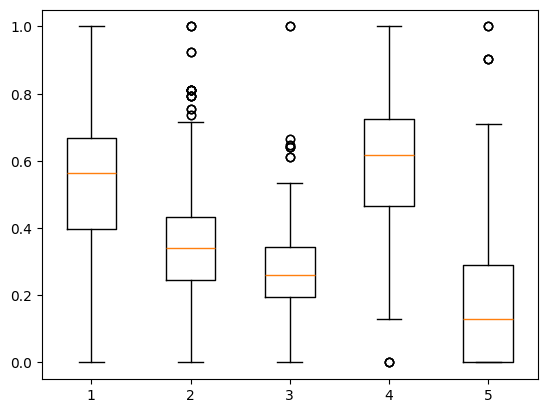

In [20]:
plt.boxplot([tr_x2[:,0], tr_x2[:,1], tr_x2[:,2], tr_x2[:,3], tr_x2[:,4]])
plt.show()

In [21]:
## 오를 수도 떨어질수도 0.704

In [22]:
model = LogisticRegression().fit(tr_x2,tr_y)
pred = model.predict(te_x2)
1-np.mean(np.abs(pred-te_y))

0.704

In [23]:
tr_x2 = tr_x.copy()
te_x2 = te_x.copy()

tr_x2 = standadization(tr_x2)
te_x2 = standadization(te_x2)

In [24]:
def ourlier_deletion(x,y):
    r, c = np.shape(x)
    for i in range(c):
        iqr = np.quantile(tr_x2[:,i], 0.75) - np.quantile(tr_x2[:,i], 0.25)
        inx = np.where(x[:,i] < (np.quantile(x[:,i], 0.75) +1.5*iqr))[0]
        x = x[inx]
        y = y[inx]
    return x, y

In [25]:
tr_x2, tr_y2 = ourlier_deletion(tr_x2, tr_y)
te_x2, te_y2 = ourlier_deletion(te_x2, te_y)

In [26]:
tr_x2 = normalization(tr_x2)
te_x2 = normalization(te_x2)

In [27]:
model = LogisticRegression().fit(tr_x2, tr_y2)
pred = model.predict(te_x2)

1-np.mean(np.abs(pred-te_y2))

0.7142857142857143

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2c33a70>,
 'caps': [<matplotlib.lines.Line2D at 0x2b25000b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2c33800>,
 'medians': [<matplotlib.lines.Line2D at 0x2b25006b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b25009b0>,
 'means': []}

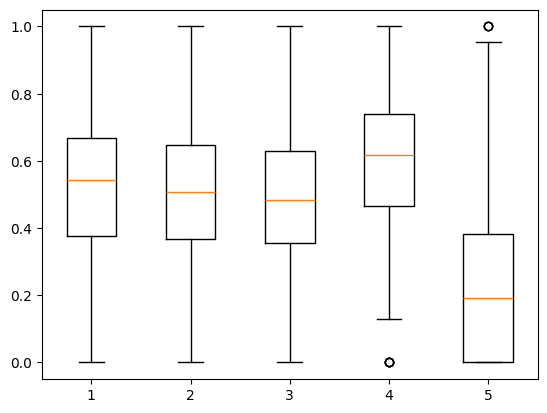

In [28]:
plt.boxplot([tr_x2[:,0], tr_x2[:,1], tr_x2[:,2], tr_x2[:,3], tr_x2[:,4]])